# Manipulating bibliographic metadata in OpenRefine
[OpenRefine](https://openrefine.org) is an open-source tool originally developed by Google. It's described as "a powerful tool for working with messy data," and that's an accurate (if modest) description. 

On first blush, OpenRefine looks more or less like a spreadsheet, with information laid out in columns and rows. But it provides tools for making short work of data cleaning tasks like: clustering similar items, bulk editing many items simultaneously, and retrieving further information about the data you already have from various sources online.

If you haven't installed OpenRefine yet, you can [download it here](https://openrefine.org/download.html), where you'll also find installation instructions for your operating system of choice.

In this notebook, we'll make use of OpenRefine's graphical interface to regularize the places of publication for a set of bibliographic records and (after a short detour through Google Sheets) retrieve latitude and longitude coordinates for those publication cities so that we can display them on a map.

All the screenshots in this notebook will be drawn from of ESTC records related to John Bunyan's *The Pilgrim's Progress*, but if you gathered metadata for items you're actually interested in, feel free to use that, instead. (You'll probably have to make some adjustments to the steps you see here to fit your data, but that's, oh, a good 60% of the fun, let's say.)

## Getting started with OpenRefine
When you launch the OpenRefine application, it actually starts a miniature web server on your computer and opens a tab in your default web browser. (While the OpenRefine documents have some browser recommendations, I don't recall running into any serious trouble using Safari on the Mac. Still, if you run into trouble with your default browser, you can just paste [http://127.0.0.1:3333/](http://127.0.0.1:3333/) into the address bar in Chrome—once you've launched the OpenRefine application, that is.)

### Importing your data
To start a new project, make sure "Create Project" is selected at the left of the OpenRefine window, and that you're set to "Get data from This Computer."

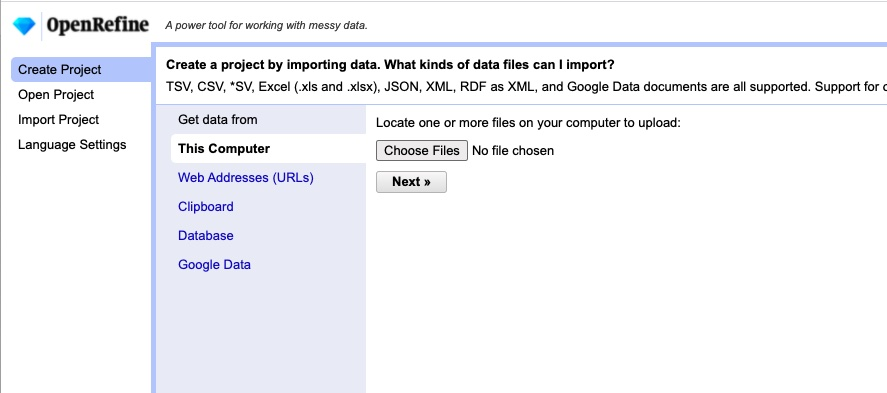

Click "Choose Files" and, in the dialog box that will pop up, navigate to the .csv file that you exported from Zotero. Click "Open" and you'll be returned to the main window. Then click "Next."

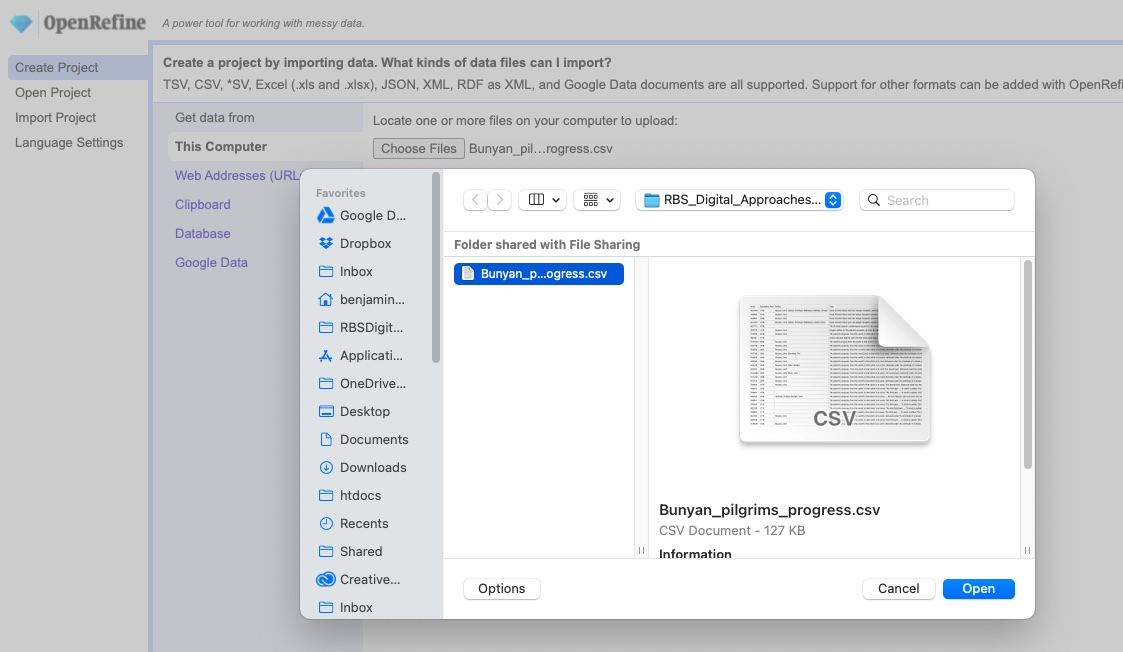

It may take a moment for your data to load. When it does, you'll get a preview of the rows and columns that OpenRefine has detected in your .csv file. If everything looks okay, you can give your project a name (by default, the project will use the name of your .csv file, followed by " csv." If you want to rename it something more decriptive, now's the time) and click "Create Project." If something looks amiss, there are some options for adjusting how your data are imported.

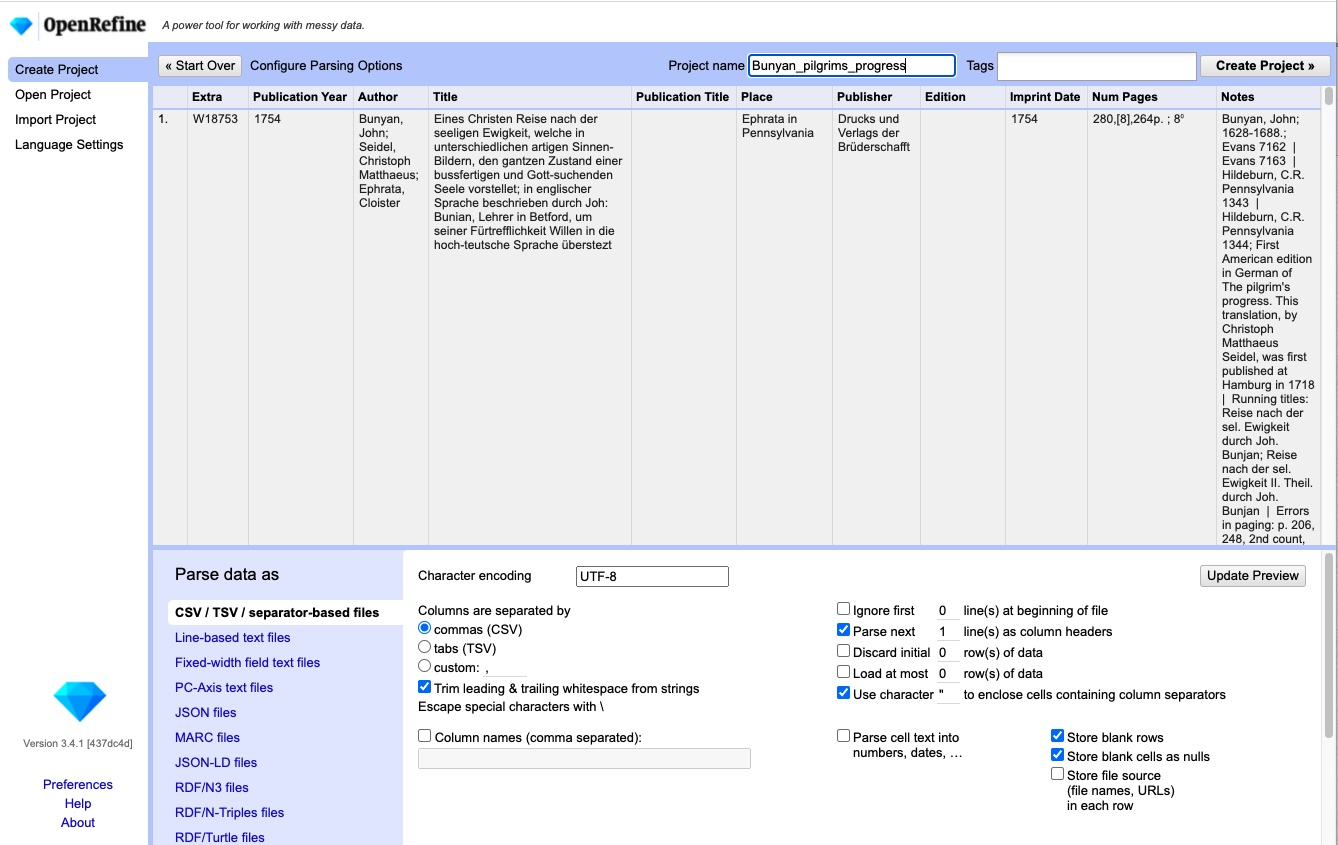

### Looking around
OpenRefine will take a moment to create your project. Once the project is loaded, you'll see a series of rows and columns with your data. (I have a few extra extensions installed, so your screen may not look exactly like mine.)

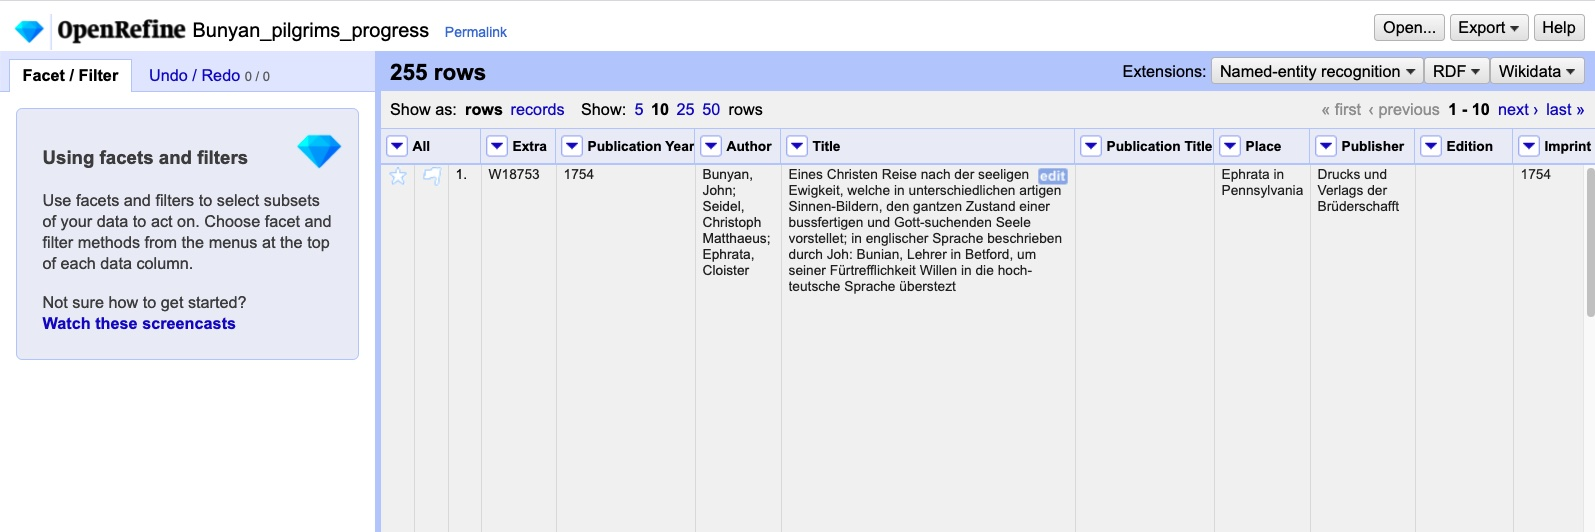


It's worth taking a moment to have a look around the interface and see what you can see.

The OpenRefine interface is more or less like a spreadsheet, but to change the contents of a cell, you need to hover over the cell until the "edit" button comes into view (as seen in the "Title" column in the screenshot above.) 

We'll see more of the interface in action as we go, but for now notice: 

* The column at the left of the window with tabs for faceting/filtering our data and for reviewing and undoing changes we've made. (If you make a mistake along the way, you can roll things back to where things were before.
* The star and flag icons in the left-most columns of the data table. (You can use these to select rows to act on—usually after you've faceted or filtered your data to only include rows that meet certain criteria.
* The downward-pointing arrows at the top of each column. (These allow you to act on an entire column at once.)

## Regularizing place names
For this exercise, we want to identify all of the places where *The Pilgrim's Progress* was published prior to 1801. There's going to be a fair amount of duplication here, but slight inconsistencies in the source data are going to make it seem like there are more places than there really are. Some of the inconsistencies may be due to genuine differences in the imprint statements that were transcribed for the catalog records. But it's also not uncommon to see small data entry errors turn up (punctuation that doesn't follow cataloging rules, for example, or simple typos). The records I'm using for this walk-through are actually quite regular, already, which is a testament to the quality of ESTC cataloging. But there are also only about 250 records—the more records you look at the, the greater the chances of small inconsistencies creeping in.

### Faceting our data
Let's get a preliminary view by clicking the arrow at the top of the "Place" column, mousing over "Facet" until the submenu appears, and then selecting "Text facet." (**Note:** Your column headings will be different if you used Zotero's standard CSV export, rather than the ESTC-CSV export I used.)

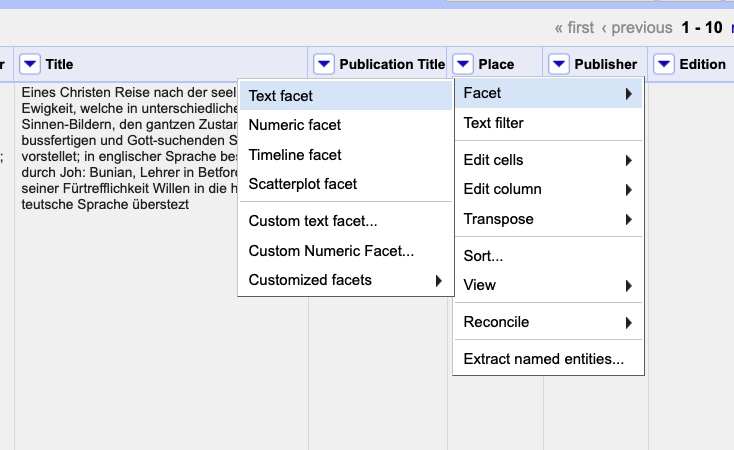

In my sample, it turns out that my 255 rows have only 37 distinct values in the "Place" column. We can see right off the bat, though, that several of them are variants of "London."

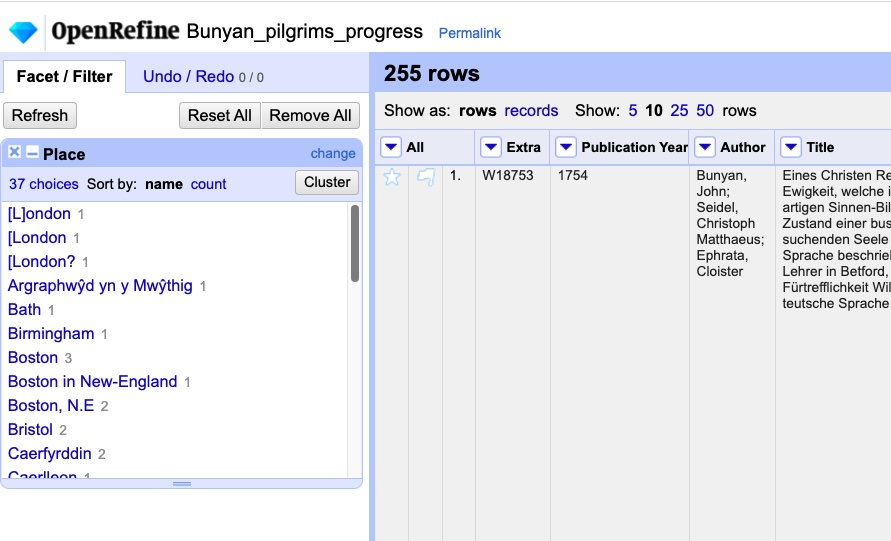

### Clustering
With only 255 records, it wouldn't take *too* long just to clean all this "by hand": we could sort our data on the "Place" column, then scan through the rows to look for variants, copying and pasting our preferred form where appropriate. 

But OpenRefine offers us an even easier way: it will attempt to find clusters of duplicates and near-duplicates, then bulk-edit those rows to all be the same value. It's pretty great.

#### Ehhhh... Maybe let's work on a copy of our data
OpenRefine has a good undo/redo feature, so we could just go to work with abandon. But it's probably a better idea to work on a copy of our place name column, rather than modifying the column in place. Working on a copy preserves the original form of the data, which can be handy if we realize later that something we thought was unimportant turns out to matter, after all. (We might decide later, for instance, that we really want to distinguish between records that say "London" in the imprint and others where London is the inferred place of publication.)

Click on the arrow at the top of the "Place" column, mouse over "Edit column," and then select "Add a column based on this column..."

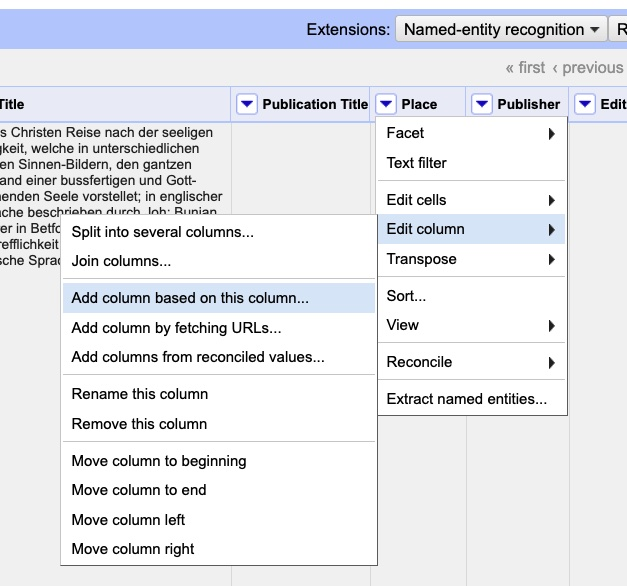

We'll do more exciting things with this window in the future, but for now just supply a title for the new column and click "OK."

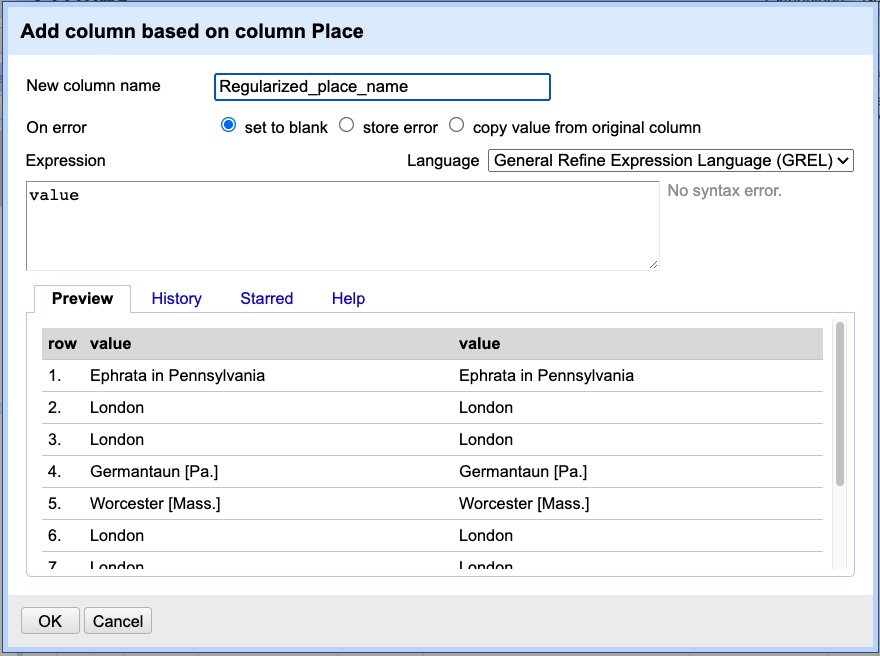

Now we can set to work on bulk-editing our place names without worrying about losing any of our original data. 

(Since we're now going to be working on the "Regularized_place_name" column, let's add a new text facet for that column so we can see our changes as they happen. Just like above: click on the arrow at the top of the "Regularized_place_name" column—or whatever you decided to call it—mouse over "Facet" and then select "Text facet.")

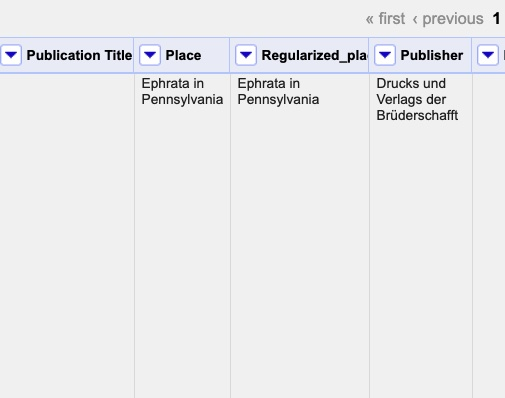

#### *Now* clustering
To begin clustering the values in the Regularized_place_name column, click on the arrow at the top of that column, mouse over "Edit cells," and select "Cluster and edit."

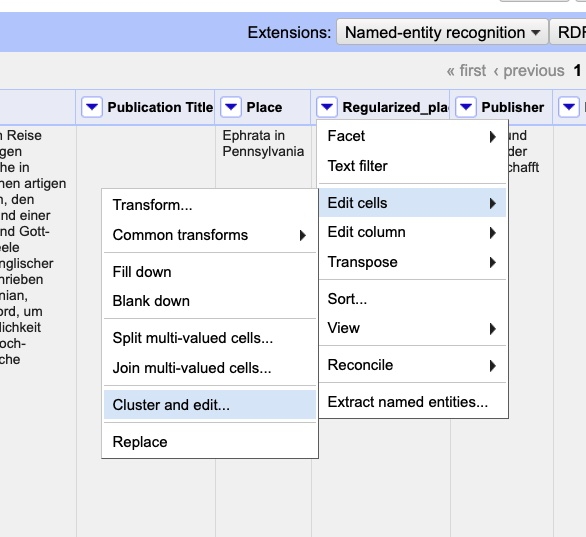

OpenRefine offers a number of different methods for clustering results, as well as different parameters that can be applied to those different methods. 

Different methods will detect different clusters, so it's worth trying out different settings to see what they get you. The initial setting ("key collision" using the "fingerprint" keying function, will group several variants of "London" quite nicely, for example...

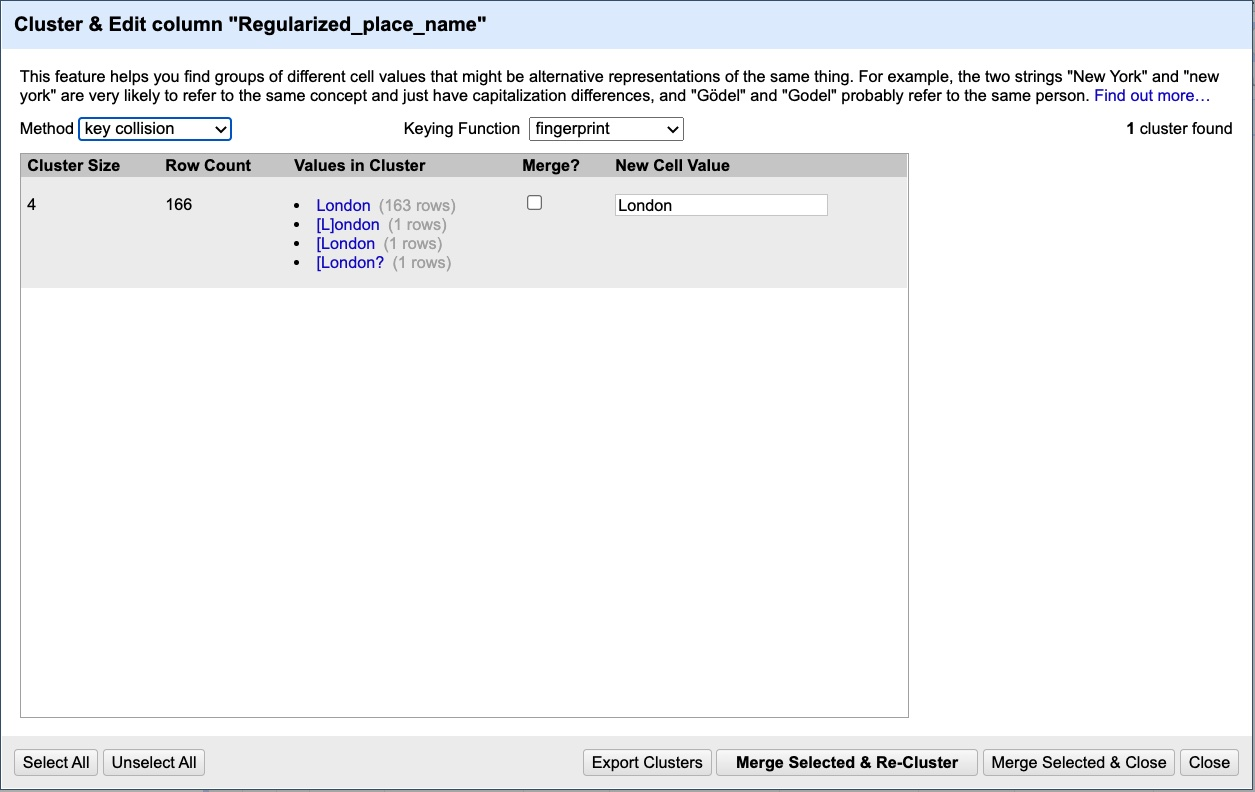

Changing the keying function to "Daitch-Mokotoff," on the other hand, finds that London cluster and several others. 

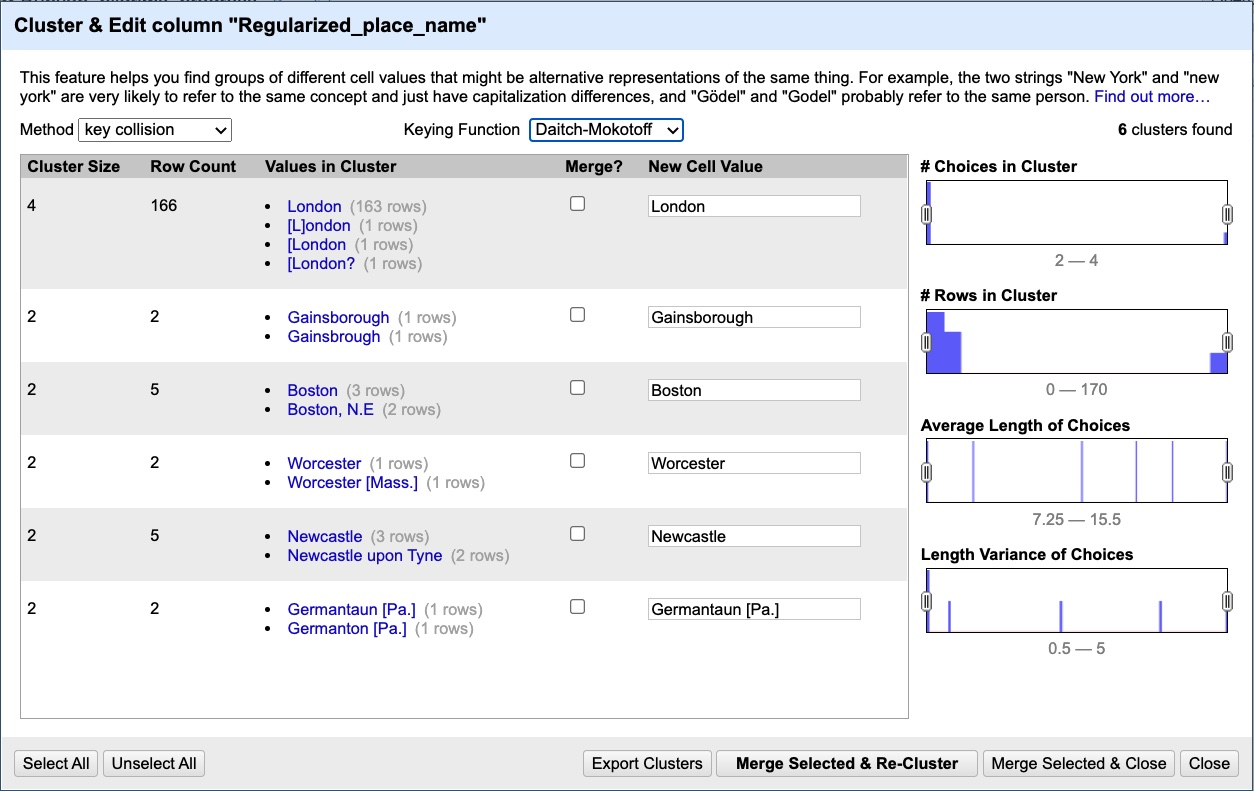

#### Make sure you know your data
I'm feeling pretty good about "Germantaun [Pa.]" and "Germanton [Pa.]" being the same place, but I'm not 100% positive that those Worcesters are the same: they're *probably* both Worcester, MA, but maybe one of them is Worcester, UK?

Discretion being the better part of valor, I'm going to close this dialog box for a minute and use my facets just to double-check those Worcesters.

Back in the main window, in the faceting box for my "Regularized_place_name" column, I scroll down to the Worcesters, then hover over each line until text reading "edit include" appears, and click include to facet my selection down to just those rows.

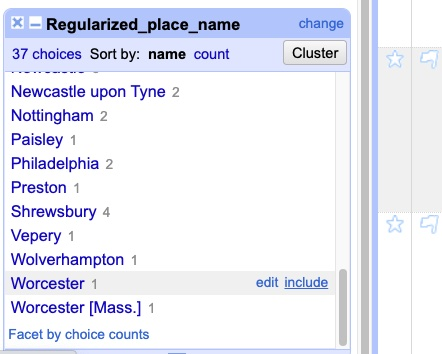

Well, sure enough, they *are* both Worcester, MA.

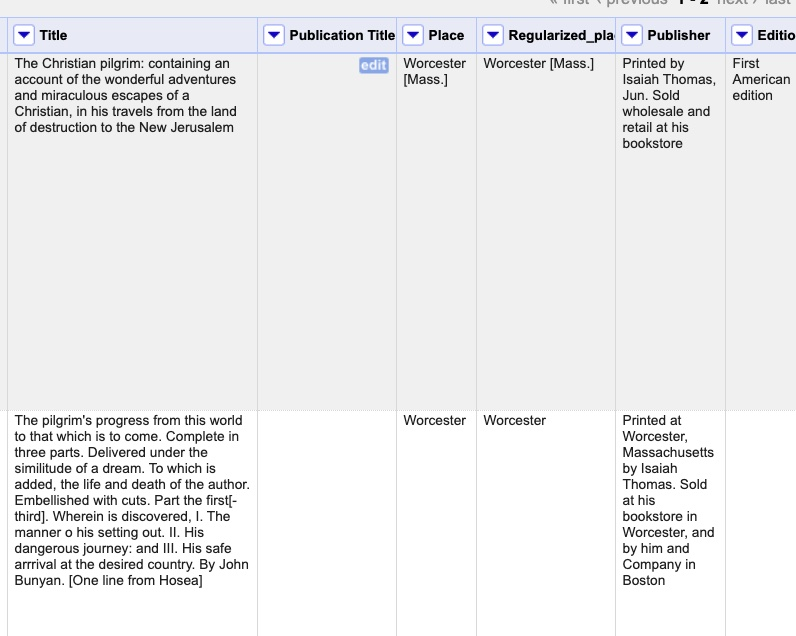

I'll remove the faceting selection by clicking "reset" in the upper right corner of the faceting box for the "Regularize_place_name" column, then go back to the "Cluster and edit" dialog for that column.

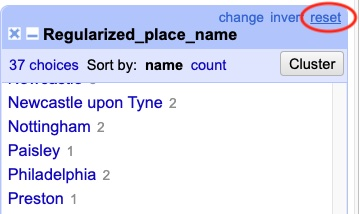

#### Clustering: *This* time, for sure.
Back in the "Cluster and edit" dialog (click on the triangle at the top of the Regularized_place_name column, then "Edit cells," then "Cluster and edit"), I select the checkboxes for all of the clusters that I want to merge. (That's all of them, in this case, but I could leave some unchecked if they turned out to be incorrect—if there really had been two different Worcesters, for example, I could accept all the other suggestions but leave the Worcesters unmerged.) 

I'll also supply a preferred form to be applied to all of the clustered cells. Because we're going to use this value to look up latitude and longitude coordinates later, I'm going to provide an abbreviation for US states and a country code for UK cities. 

When all that's entered, clicking "Merge Selected & Re-cluster" will process all the clusters we know about and look for any new ones that emerge.

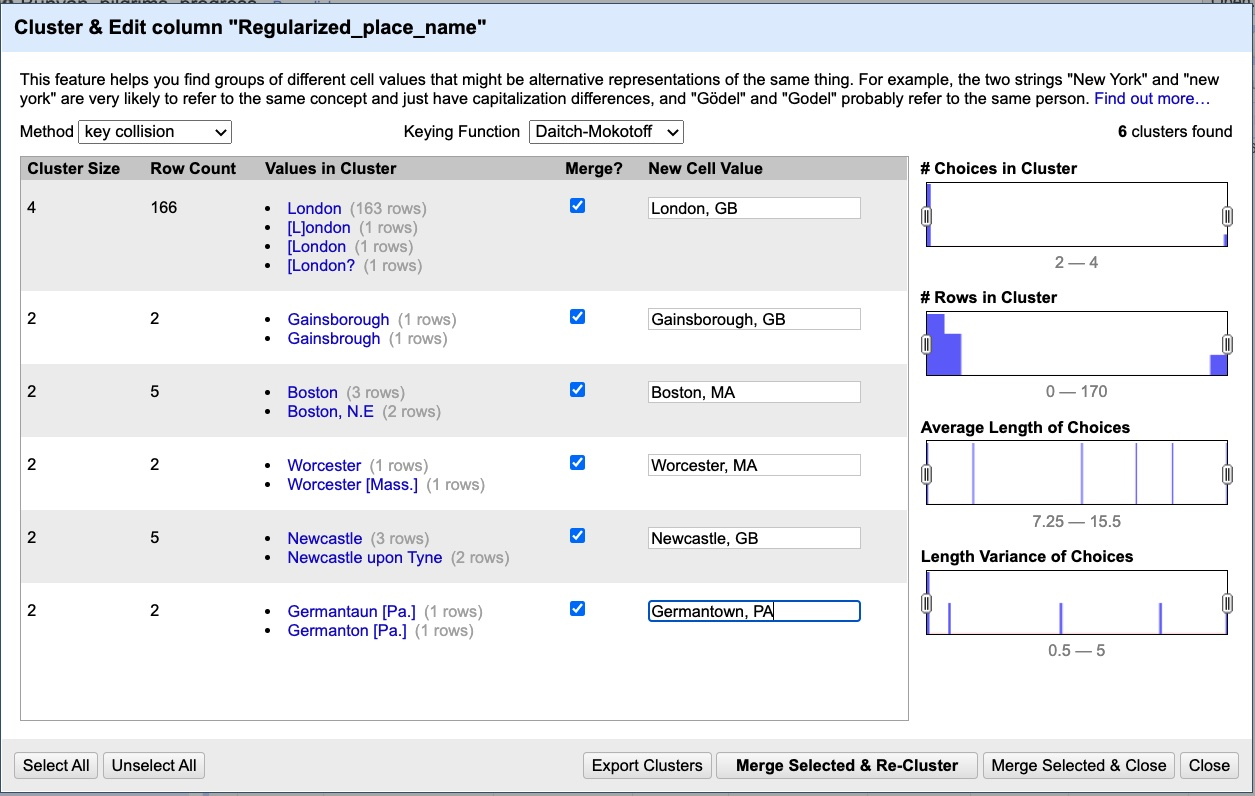

In this case, none of OpenRefine's clustering methods are able to find any additional clusters—though your results may vary, depending on the dat you're using. Once OpenRefine has found all the clusters it can find, click "Close" to return to the main window.

### More work with facets
OpenRefine's automatic clustering made a fair bit of progress (more than half of the place names in the sample I was using turned out to be London, perhaps unsurprisingly). But there's more we can do. As you may have surmised when we were faceting our results down to isolate the two Worcesters, we can edit the contents of our cells right from the facet box. So we can work our way through that list, editing as we go. 

(Not gonna lie: I had to Google this one.)

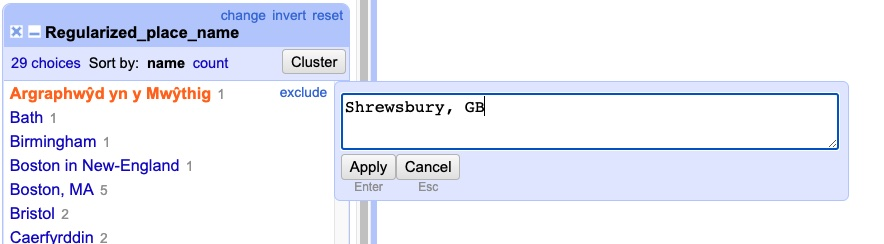

When we change, say, "Boston in New England" to "Boston, MA," we'll see that our facet count for "Boston, MA" will go up:

(Before)

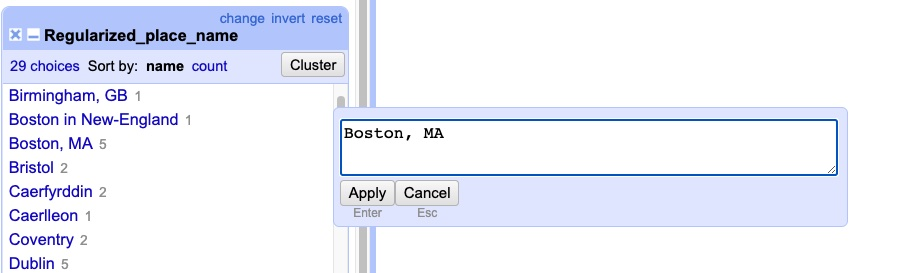

(After)

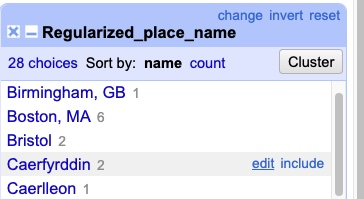

In this sample, I ended up leaning more on mass-editing using the facets box than I did on OpenRefine's "Cluster and edit" feature. But that's actually a pretty good illustration of OpenRefine's flexibility: it offers ways to automate lots of things entirely, but also provides other ways of working quickly on the things that can't be fully automated. 

I was able to get the 27 distinct place names in this file regularized in short order (it probably would have taken me no more than five minutes if I hadn't been taking screen shots and writing this guide).

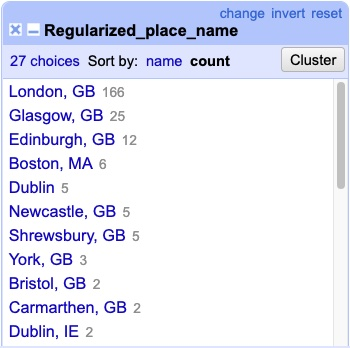

We'll do more with OpenRefine later, and see some of its more powerful features. But for now we need to get our data out of OpenRefine for a quick trip to Google Sheets before bringing a reduced set of place names back to OpenRefine.

### Exporting from OpenRefine
OpenRefine offers us quite a few for exporting our data. To keep things simple, we'll just export our data to Google Sheets. Click the arrow next to "Export" in the upper right corner of the window, then select "Google Sheets." 

(You'll need to grant OpenRefine access to your Google Drive account, which brings up an alarming-sounding warning about what OpenRefine will be able to do to the contents of your Google Drive. If you'd rather not export directly to Google Sheets, you could download a Comma-separated value \[.csv\] or .xlsx file, instead, then upload it to Google Drive.)

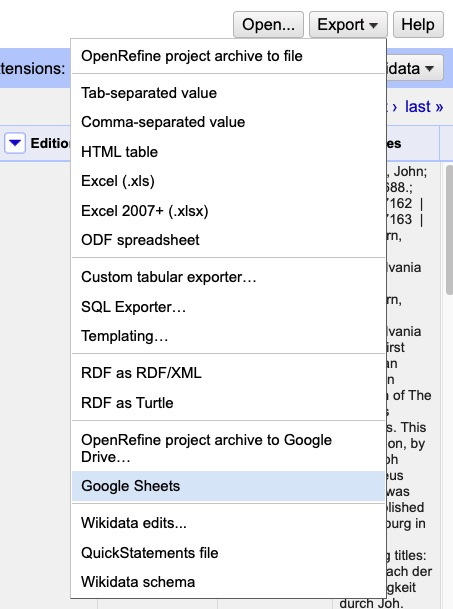


## Getting distinct places in Google Sheets
OpenRefine allowed us to regularize the place names from our 255 catalog records. As we saw, though, there were only 27 distinct places represented in those 255 rows. We *could* have stayed in OpenRefine to search for latitude and longitude coordinates for all 255 rows, but that would have meant running many duplicate searches, which would be both pointless and rude. (Anyone who's ever spent time with four year-olds will have a vivid sense of what it would be like to be on the receiving end of, "Where is 'London, GB'?" "Where is London, GB'?" Where is London, GB'?" 166 times.)

We're going to use Google Sheets to eliminate all the duplicates and come away with just the 27 distinct names we need to search for. While we're at it, though, we'll keep track of how many records we had for each place. We'll do this using a [pivot table](https://en.wikipedia.org/wiki/Pivot_table), which allows us to get at a summary view of our data very easily.

#### An aside for catalogers who might actually be able to use this in your day job
I'm going this route in this notebook in order to reduce the number of times I hgave to query the GeoNames server. In this example, I really only need to get the coordinates for each place once. If you wanted to insert geolocation information into a collection of catalog records, though, it might very well make sense to stay in OpenRefine to do this—particularly if you're somebnody who takes advantage of the OpenRefine integration that's been built into [MarcEdit](https://marcedit.reeset.net/). 

If that sounds like you, you might want to learn more about OpenRefine's reconciliation services. Christina Harlow has written a [Python-based GeoNames reconciliation service](https://github.com/cmharlow/geonames-reconcile) for OpenRefine, for example, and Josh Weisman has written a [similar service for Node.js](https://github.com/jweisman/geonames-openrefine). I haven't used either of these, myself, but they might provide a good solution, depending on your needs.

### Creating a pivot table
A pivot table reorganizes the data we have in a different way,  aggregating and summarizing the data by "pivoting" rows into columns. 

Our first step is to select our entire spreadsheet, which we can do by clicking the cell in the upper left (to the left of column A and above row 1):

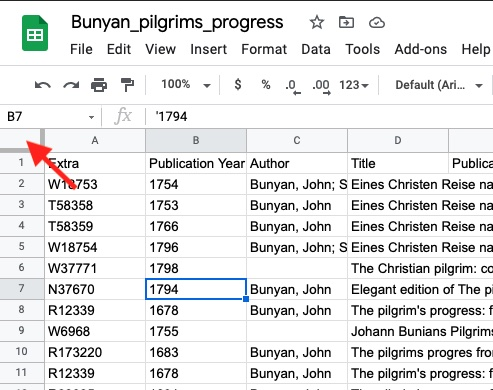

With the entire table selected, go to the "Data" menu and select "Pivot table"...

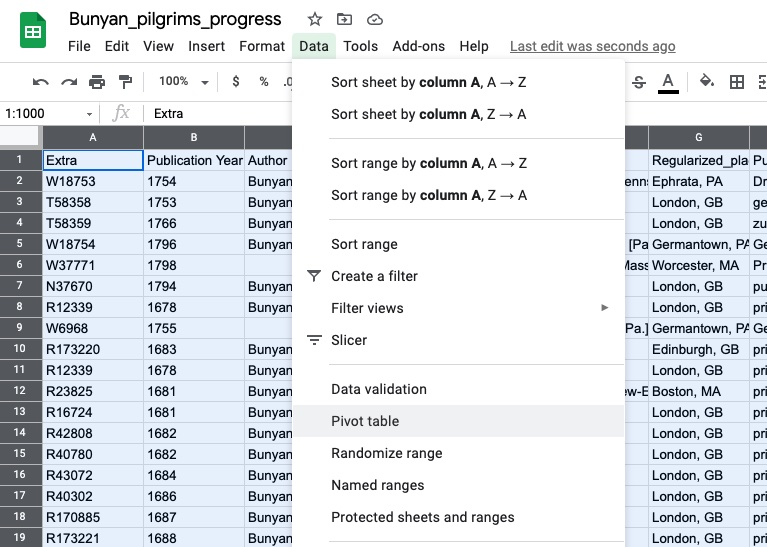

We want to limit our pivot table just to rows that actually have something in them—otherwise we'll end up with blank values in our pivot table. So click on the small grid in the upper right of the dialog box... 

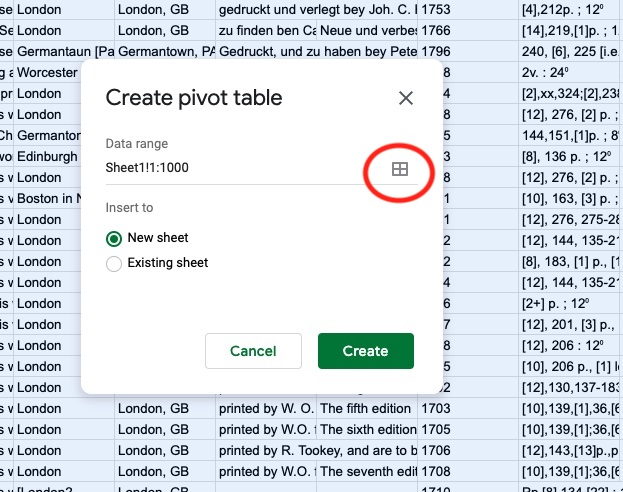

... then accept the suggested table range. 

\[**Note:** While proofreading, it occurs to me that I probably would have done better to accept the *other* suggestion that specified not just rows, but also columns. No real harm done, as it is, but that probably would have been still better.\]

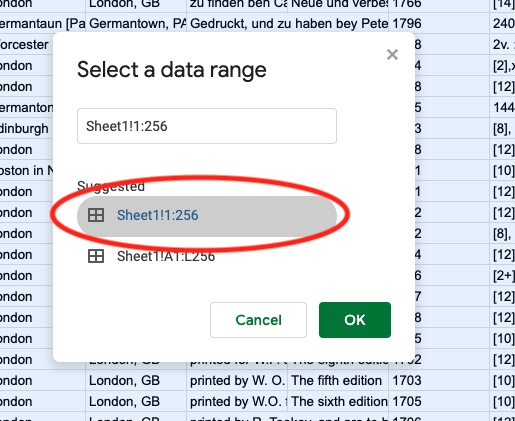

### Populating our pivot table
We have to add the information that we want summarized to the pivot table. The interface for doing that is on the right side of the window.

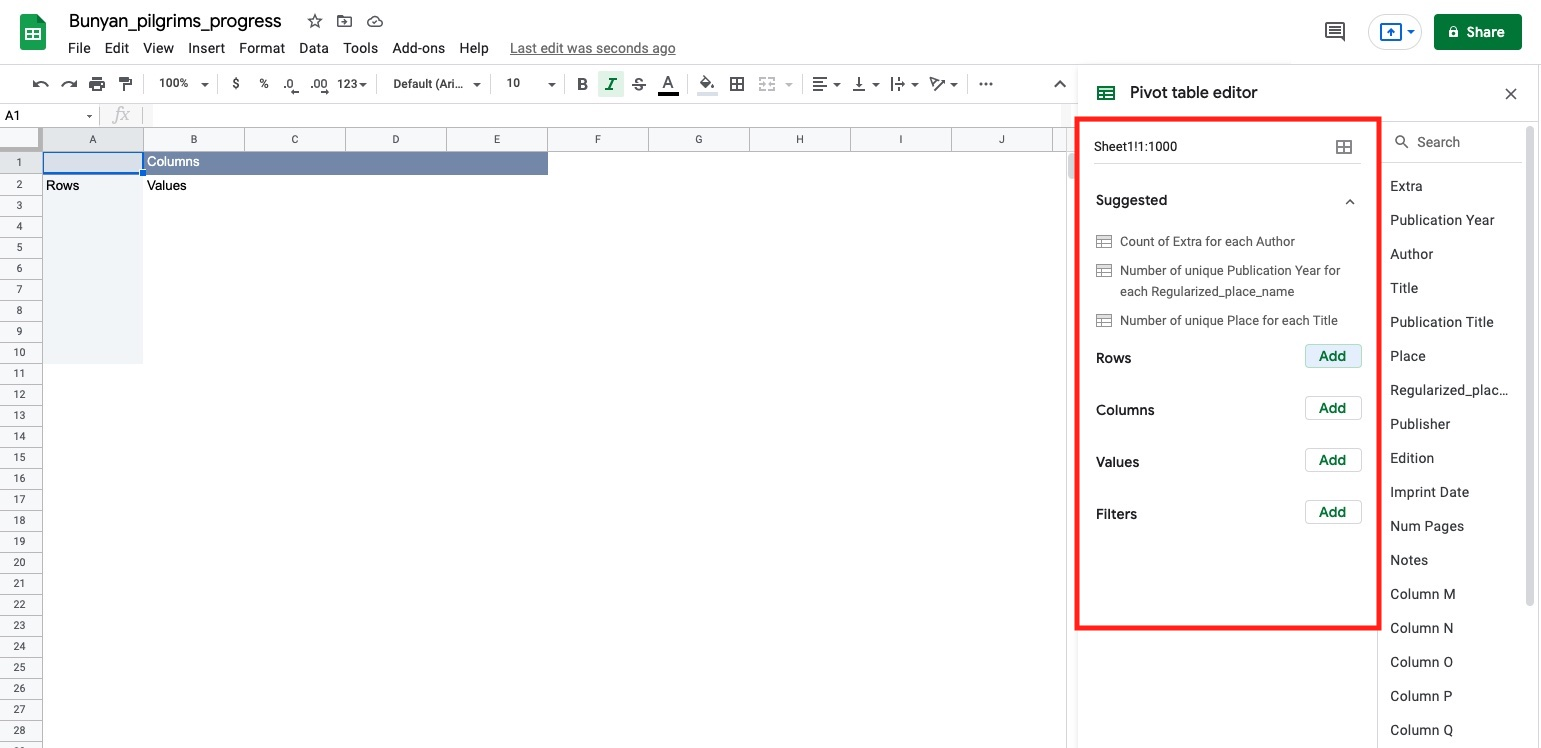

Click the "Add" button next to "Rows," then choose "Regularized_place_name." (Go ahead and uncheck the "Show totals" checkbox, as having a total row will give us a \[minor, ignore-able\] error when it comes time to import this information into Google Maps.) This will give us one row for each of the  regularized place names we found in OpenRefine.

(**Note:** By default, columns in the pivot table are named according to the source column in the spreadsheet. In this screenshot, I've renamed the column "Place" by double-clicking in cell A1 and changing "Regularized_place_name" to "Place.")

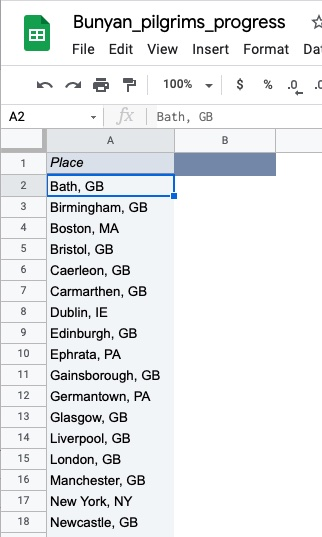

If we have a value in our data that can serve as a unique identifier for the record, we can also get a count of how many records are associated with each place name. (In this sample, I'm using the ESTC number from the ESTC records we started with. If you used the default Zotero CSV exporter to export metadata from a different source, the Zotero "Key" field would serve the same function.)

Click the "Add" button next to "Values" and select the column with your unique identifier. The Pivot Table editor gives you a few different ways to present values. We need to use "COUNTA" to get a count of distinct values. (Something like "SUM" would not work in this instance!) 

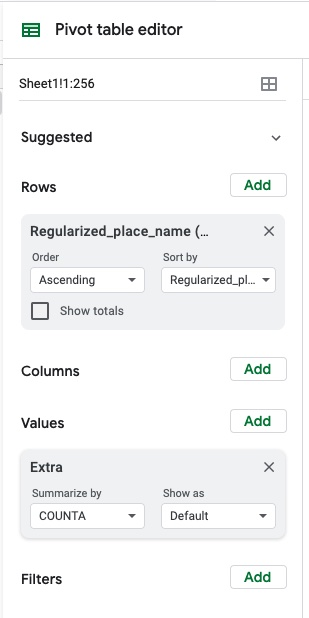

Our pivot table will now show a second column: for every distinct place name, we now have the count of records that we started with. (In this screen shot I have once again changed the title of the column by editing cell B1.)

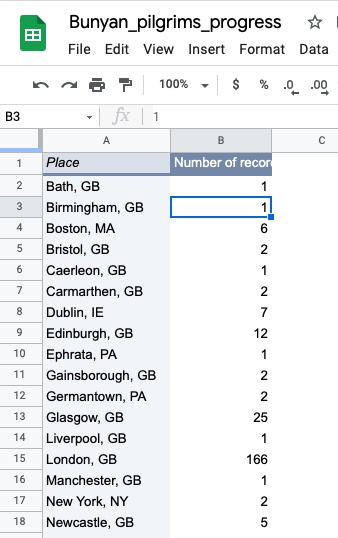



## Getting latitude and longitude coordinates
We'll handle these next steps in Google Sheets, but they'll be alongside our pivot table (rather than adding columns to it). In lots of what follows, we'll be doing things that pretty much any spreadsheet program can do, but we'll also take advantage of some neat tricks that (I believe) are specific to Google Sheets.

Now that we have our regularized place names, we need to get coordinates to place them on a map. For this, we need to consult some kind of geocoding service. There are lots of such services out there, including many that are free to use (at least for a limited number of searches every month—usually in the thousands). Generally speaking, these services will require you to establish some kind of account with them: you'll get a username or API \[Application Programming Interface\] key that you then provide whenever you request geocoding data. For the sake of convenience, we'll use the [GeoNames](https://www.geonames.org/) service, as it's cost-free and I've already set up a username for use with this course that everybody can use, rather than each student having to get their own API key. 

**Note:** I haven't put the GeoNames username into the code snippets below because this notebook is available publicly on GitHub. I'll put the username in the Zoom chat and on Slack. Where you see `<geonames-username>` below, just be sure to replace it with the course username.

### The GeoNames `search` API
We're going to use GeoNames' general `search` service. Like any API, GeoNames' `search` only knows how to respond to queries that come to it in a specified form. If we construct a URL that queries the GeoNames server in the way it's expecting, we'll get an answer. If we send it a URL that's not formatted in the way the server knows how to respond to, though, we'll get an error.

The [documentation for the `search` service](https://www.geonames.org/export/geonames-search.html) tells us how to construct our query to get a response. Our URL needs to begin with `api.geonames.org/search?`. After the question mark, we can add any (or all) of several different parameters, with those parameters and their values chained together with ampersands (`&`). For our purposes, we'll use the following:

* `q`: A generic text query. (Note that a URL can't have any spaces in it, so we'll need to replace spaces with an encoded character \[`%20`\]. We'll handle that when we get to it, but I wanted to mention it here, because that's how it appears in the discussion below.)

    **Note:** Some of my place names have city names and abbreviations for US states (like "Worcester, MA") and some have a city name and a country code (like "Dublin, IE"). If all of my place names had country codes, I could construct a query using the `name` parameter for the city (and state) and the `country` parameter for the country (e.g. `name=Worcester%20MA&country=US` or `name=Dublin&country=IE`). Since I wasn't that consistent, though, I'll just use the `q` parameter, which "search[es] over all attributes of a place : place name, country name, continent, admin codes,..."

* `maxRows`: How many results do we want the server to return?

    We'll just want one.

* `type`: What format should the response take (XML, JSON, or RDF)?

    We'll go with XML, since that's easy to work with directly in Google Sheets. That's the default, so we don't actually need to specify a `type`. I wanted to call attention to it, though, because in other circumstances, you might prefer JSON or RDF.

* `username`: GeoNames is cost-free, but it's rate-limited, so we need to give our username to make sure we're still within our quota for the month.

### Constructing our query URLs
To construct the URLs to use in querying the GeoNames server, we need to enter this formula into cell C2 of our Google Sheets spreadsheet:

>`=CONCATENATE("http://api.geonames.org/search?q=",SUBSTITUTE($A2,", ","%20"), "&maxRows=1&type=xml&username=<geonames-username>")`

(**Remember to replace `<geonames-username>` with the username for the course.**)

The `CONCATENATE` function concatenates (or puts together) pieces of text. In this case, we're concatenating:
* A fixed string for the beginning of our URL (`http://api.geonames.org/search?q=`)
* A version of the contents of cell A2, modified by the `SUBSTITUTE` function:
    - In cell A2, for any occurence of ", ", substitute "%20", instead.
    (Note, the dollar sign in front of the A is just there to make sure that, wherever this formula might get pasted, it always looks in column A. There's no dollar sign in front of the 2 because we want the row number to change when we paste this formula in other rows.)
* A fixed string with the rest of our query

When you hit `enter`, the value of cell C2 will become the URL we just created. (Because Google Sheets recognizes it as a URL, it will be formatted as a hyperlink.) 

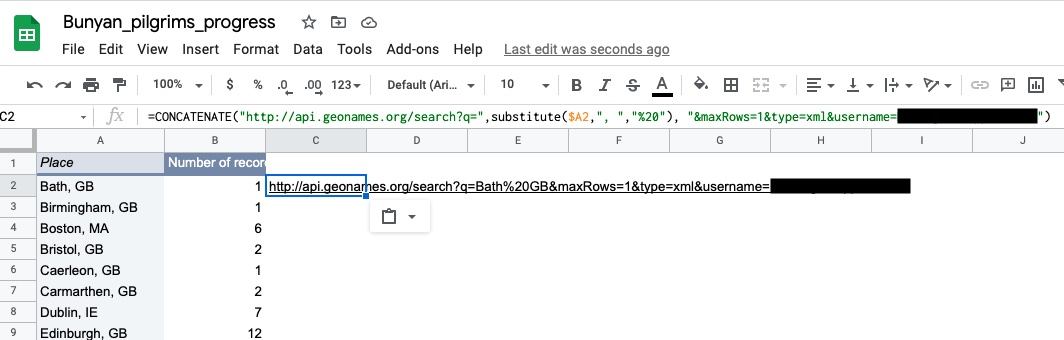

Copy cell C2, then highlight the rest of the cells in column C and paste. The rest of the rows will fill in with the appropriate query URLs.

#### A GeoNames response
Let's take a quick look at the kind of response we get from GeoNames:
>
```
<geonames style="MEDIUM">
    <totalResultsCount>6628</totalResultsCount>
    <geoname>
        <toponymName>Worcester</toponymName>
        <name>Worcester</name>
        <lat>42.26259</lat>
        <lng>-71.80229</lng>
        <geonameId>4956184</geonameId>
        <countryCode>US</countryCode>
        <countryName>United States</countryName>
        <fcl>P</fcl>
        <fcode>PPLA2</fcode>
    </geoname>
</geonames>
```
Note the nested-tree structure of the XML. The top-level `geonames` element is a collection of results that has (in this case) two child elements:

* `totalResultsCount`, which tells us how many results there really are (remember, we limited the number of results we'd get with `maxRows=1`)
* `geoname`, which is an individual result.

Each `geoname` element, in turn, has a number of child elements (`toponymName`, `name`, and so on). The only bits of this XML that we really care about are `lat` and `lng`. 

### Querying GeoNames from Google Sheets
Now that we have our URLs to query and know what a result of one of those queries would look like, we can actually query GeoNames from right here in Google Sheets and parse the result. 

In column D2, we need to enter this formula (which we'll then copy and paste into the other cells in column D: 

>
`=JOIN(", ",IMPORTXML(C2,"//lat"), IMPORTXML(C2,"//lng"))`

The `JOIN` function joins together different bits of text with a separator that we choose (in this case, ", ").

The two bits of text we're joining are the results of two instances of the `IMPORTXML` function. In each case, we're telling `IMPORTXML` to retrieve the URL that we defined in cell C2 and then get the contents of a particular element (`lat` and `lng`, respectively). 

(The two slashes are asking for those elements wherever they may happen to appear in the tree structure. We would get the same result by navigating the levels of the tree structure explicitly: `IMPORTXML(C2,"geonames/geoname/lat")`, for example.)

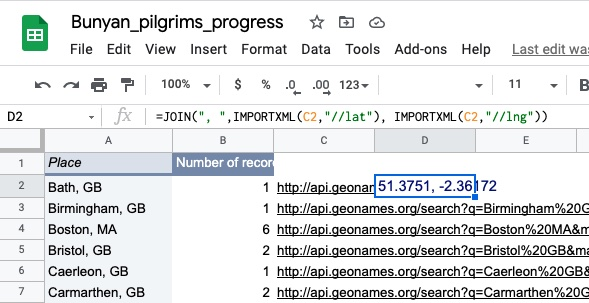

Once we paste that formula into the remaining cells in column D, we should give the column a name (I'm using "LatLng"), and then we have our coordinates for all of our locations.

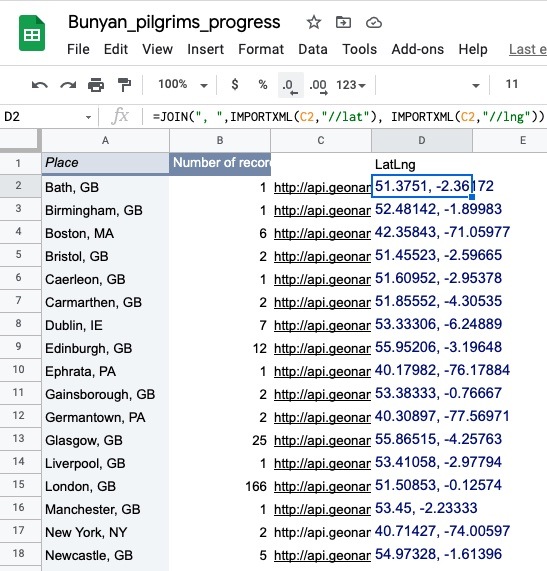

## Wait a minute: Which records go with which cities?
We now have everything we need to put these places on a map, which is great! But at this point, while we know *how many* records are associated with each place, we don't *which* records correspond to each place. 

How you proceed here will depend on the nature of the metadata you have. In the case of the sample I'm using, I'm going to use ESTC numbers to link back to the original records at the ESTC. If you got your metadata by adding records to Zotero from a library catalogue, you should end up with a link back to the catalogue record in Zotero's default CSV export. If you see something in your metadata that would allow you to link back to the original catalogue record, you can probably adapt this next step to your needs. If you don't see anything in your metadata that would serve that function, though, you can skip this step and just put your places on the map.

#### Where does "using a spreadsheet program" end and "writing code" begin?
Because they have a graphical user interface, we usually think of spreadsheets as "office productivity" software. But once you really start digging in to them, you end up doing things that are hard to distinguish from "coding." (Indeed, Microsoft's LAMBDA language for Excel functions is now [Turing complete](https://visualstudiomagazine.com/articles/2021/01/27/excel-lambda.aspx), so who knows what next year's annual budget report could be getting up to?) 

For each location, I want to be able to show a list of records that includes a link to the record in the ESTC's public catalogue at the British library, with the year of publication in parentheses. Honestly, I probably have a clearer sense of how to do this in Python than how to do it in Google Sheets. But where there is a will (and a search engine and StackOverflow), there is usually a way.

If you exported your metadata from Zotero using something other than the ESTC-CSV exporter, you'll need to adjust this formula to match your data, but here's what I did:

In cell D2, enter the following formula:

`=TEXTJOIN(CHAR(10),TRUE,FILTER("http://estc.bl.uk/"&Sheet1!$A$2:$A$256&" ("&Sheet1!$B$2:$B$256&")",Sheet1!$G$2:$G$256=$A4),1,TRUE)`

Reading (more or less) from left to right, what this is saying is:

* Make this cell equal to the result of the TEXTJOIN function...
* Using "CHAR(10)" (a line break character in Google Sheets) as a separator, join together all values where the following condition is TRUE:
  - FILTER the following construction:
      - Start with the string "http://estc.bl.uk/"
      - Add the contents of the cell in column A of Sheet1
      - Add a space and an open parenthesis
      - Add the contents of the cell in column B of Sheet 1
      - Add a closed parenthesis
  - Use the values from columns A and B where the value of of the cell in column G of Sheet 1 is equal to the value of the cell in column A of *this* sheet.

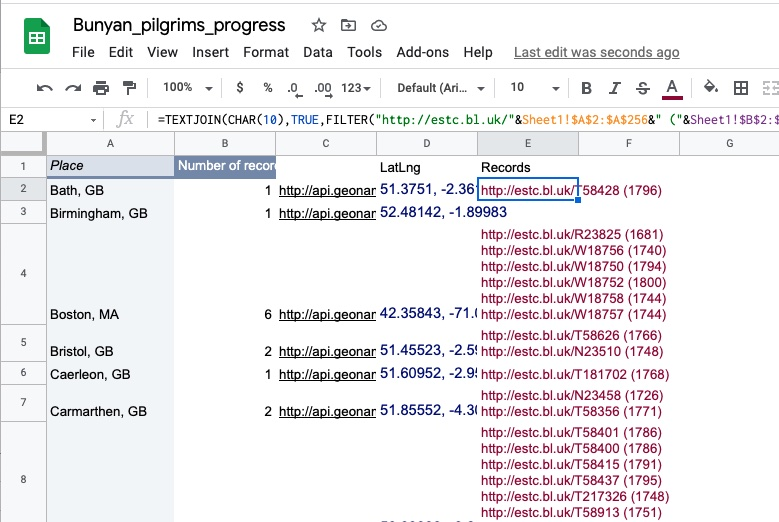

I really want to have those links arranged by ascending order of publication year. I suspect there's probably a way to do that by adding the `SORT` function in there somewhere, but my experiments so far have been fruitless. As it turns out, though, just going in to Sheet1 and sorting the spreadsheet by publication date causes the results to reorder, so I'm declaring victory for the time being and moving on.

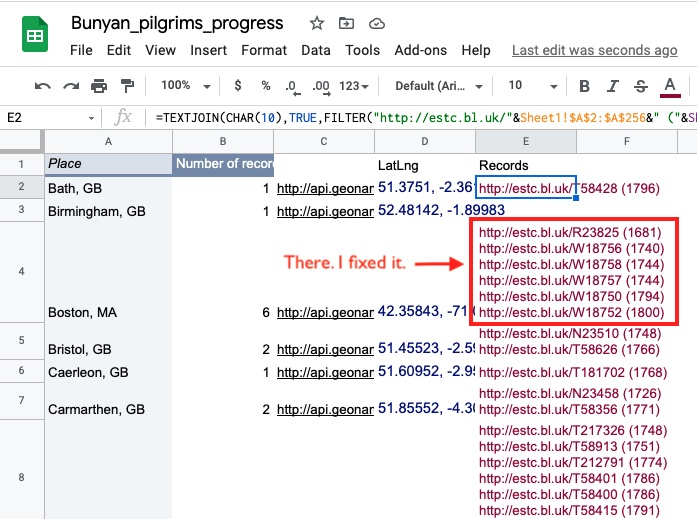

### One final adjustment in Google Sheets
In order for Google Maps to recognize our data, we need to make sure that the sheet with our latitude and longitude coordinates comes first in the notebook. Click and hold on the tab you've been working on (it should be called "Pivot Table 1"), then drag it to the left until it comes before "Sheet1".

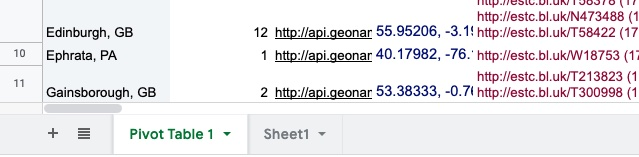

## Putting all this on a map in Google Maps
Depending on the nature of your project, you would probably end up using a different mapping platform, but Google Maps gives us a quick and easy way to see our results. 

Make sure you're logged into your Google account, then visit [https://www.google.com/maps/d/u/0/](https://www.google.com/maps/d/u/0/). (Your screen will look *very* different from mine.) Click "+CREATE A NEW MAP" near the top left of the window.

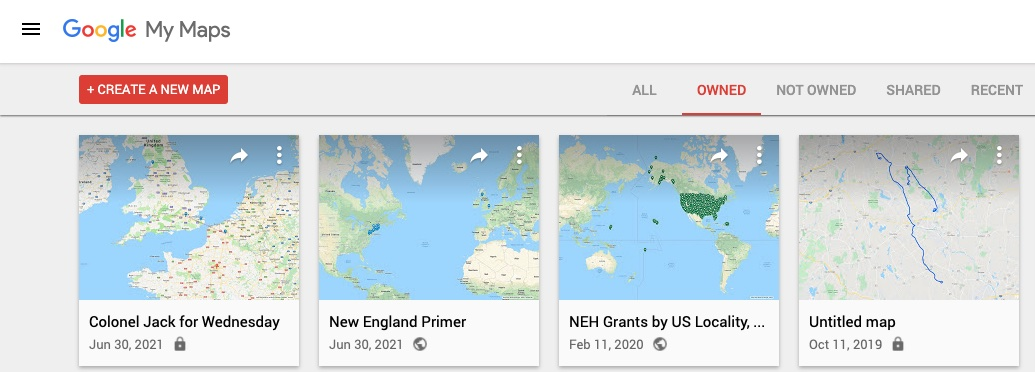


Give your map a name and then click "Import" under "Untitled layer."

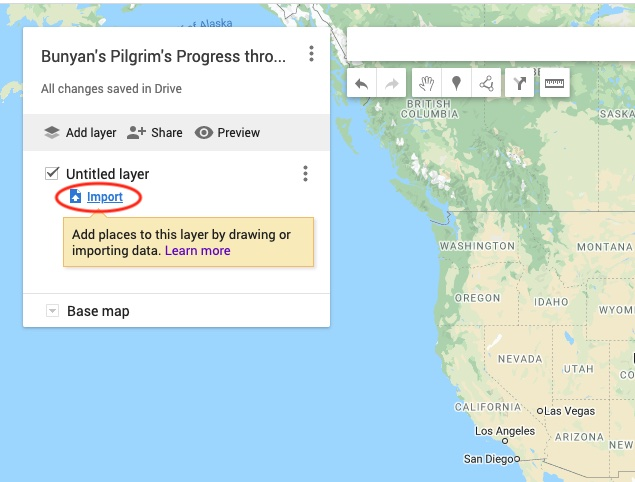

### Importing data to Google Maps
Note that Google Maps accepts a variety of different formats. Since we were just working in Google Sheets, though, click "Google Drive" and then click "Recent." Select your Google Sheets spreadsheet and then click "Select."

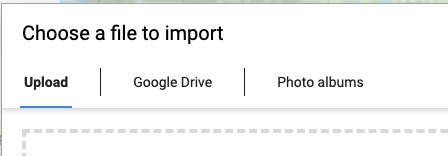

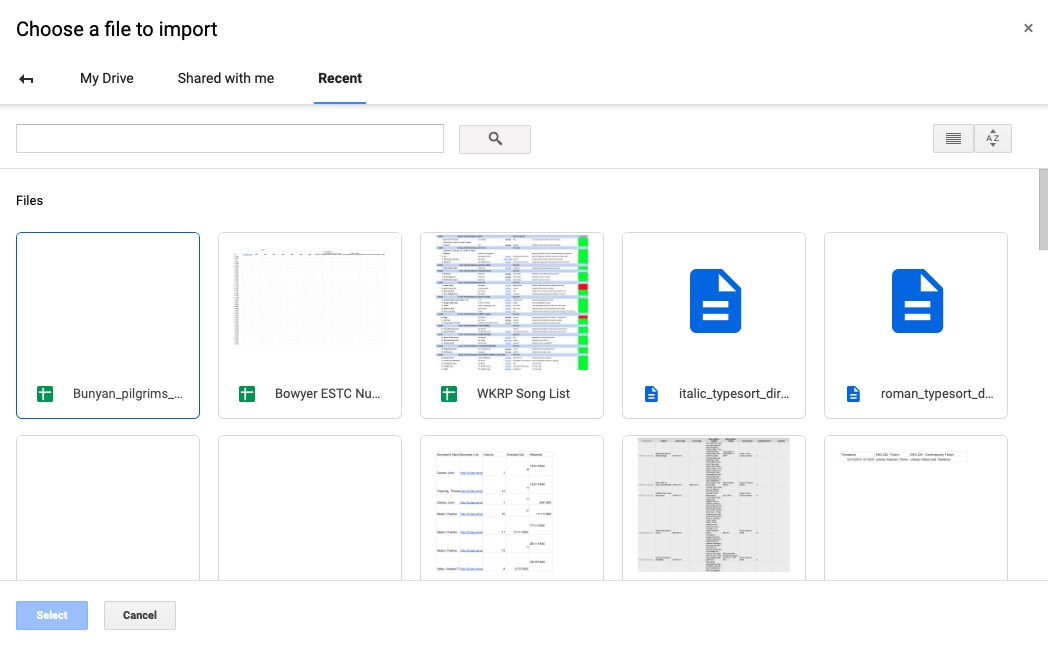

(I have no idea where "WKRP Song List" came from, but I am intrigued.)

You'll need to let Google Maps know which column to look in for your coordinates, and also specify which order the coordinates are in. (If you've been following along, yours should be in latitude, longitude order.) With those options selected, click "Continue."

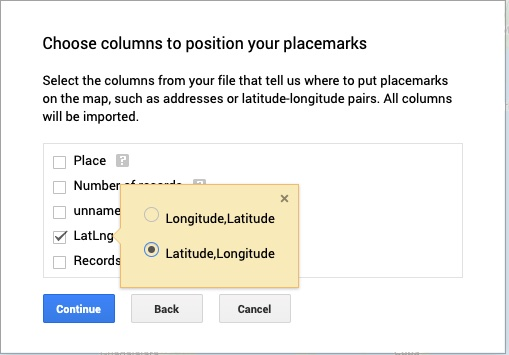

Choose a column to provide a label for your places, then click "Finish" and Google Maps will import your data.

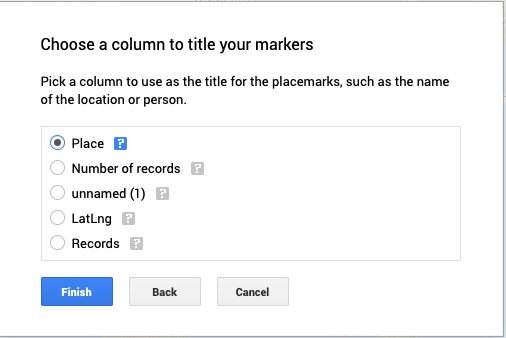

### Tweaking things in Google Maps
There are several things we can adjust in Google Maps. I've re-named the imported layer to "ESTC Records," for instance (the layer was named after the source spreadsheet by default). 

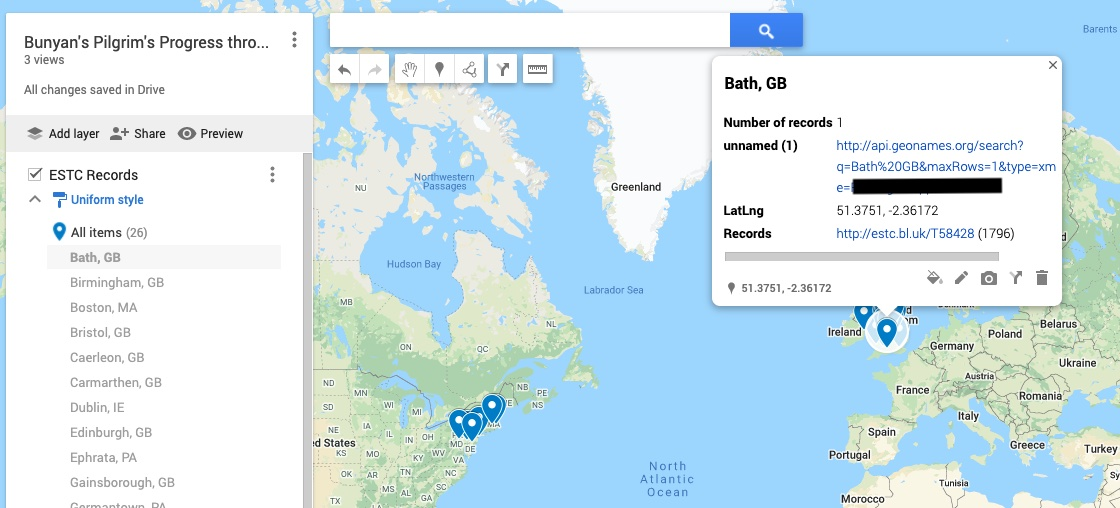


As the marker shown here shows, though, the GeoNames URL is right there in my data, and hence visible to anyone looking at the map. Not only is it unsightly, it also leaks my GeoNames API key. I could have taken steps to remove that field from the Google Sheets spreadsheet before importing the data to Google Maps, and that would probably have been the best solution.

Since I didn't, though, it's nice to know that we can make some adjustments to the data within Google Maps, itself. We just need to click the three dots to the right of our layer name and then select "Open data table."



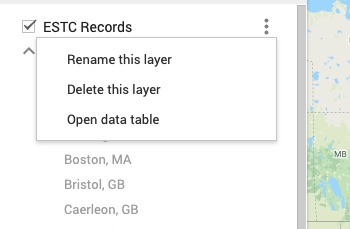

Once we have the data table open, we can click on the triangle at the top of the column and select "Delete column."

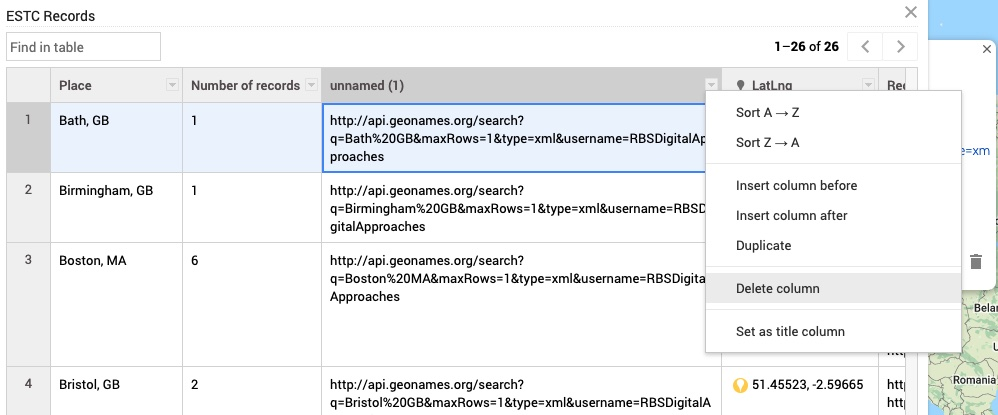

Google Maps also allows us to change the appearance of the base map. In this case, it seems a little odd to display seventeenth- and eighteenth-century publication places on a map with contemporary highways, so I'll change that.

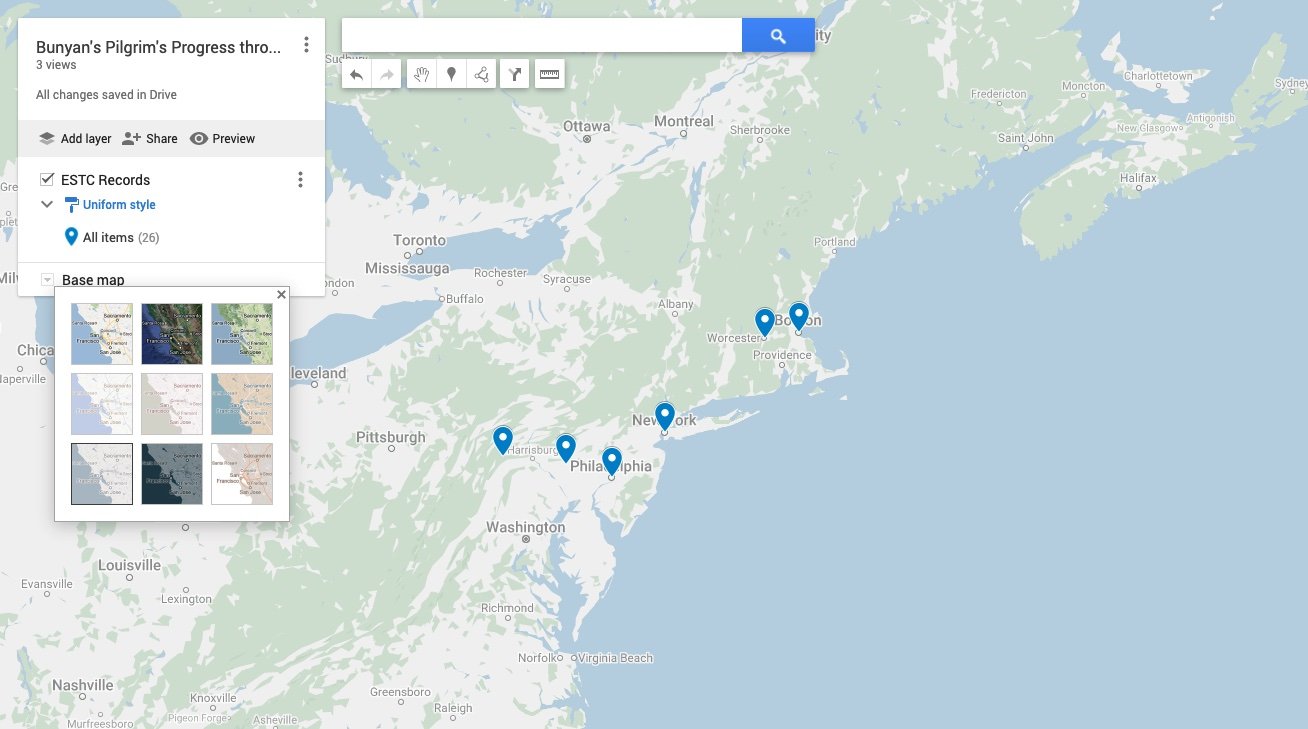

## Conclusion
Though you would probably want to use a system other than Google Maps for a professional project, this example highlights a couple of points that should be portable to other settings:

* Lots of data need cleaning before they can be used in new ways. OpenRefine can be a great tool for getting that work done.
* A crucial step in lots of workflows involves using data you have to get information from somebody else's information source.
    - It's worth thinking about how much data you need to request, and how to set up your project to request only as much as you need, and not more:  GeoNames is cost-free (though rate-limited); if we were querying an API that we had to pay for, if there were a chance of exceeding our limit and getting cut off for the month, it would be worth rationing our requests.
* Our Google Sheets example is really a simple form of the kind of web scraping that you may well find yourself using other, more code-heavy methods to perform:
    - We used a simple spreadsheet operation to construct query URLs, including an API key.
    - We retrieved data from a remote source in a specific format (XML) and parsed the data to extract just the bits we wanted.